In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 12 03:12:15 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
Find intersection point of $M$ overlapping convex sets
$$\begin{array}{ll}
\mbox{minimize } & \sum_{i=1}^M \|v-x_i\|_2^2\\
\mbox{subject to }& A_ix_i\leq b_i \mbox{ for }i=1,\ldots,M\\
\end{array}$$

# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=30)

k=0, rel_gap=inf, L=0.0, U=7.455535694737052
k=1, rel_gap=inf, L=0.0, U=7.455535694737052
k=2, rel_gap=inf, L=0.0, U=4.27218756395897
k=3, rel_gap=inf, L=0.0, U=2.4605340211429847
k=4, rel_gap=inf, L=0.0, U=1.4228202311434135
k=5, rel_gap=inf, L=0.0, U=0.821658875350552
k=6, rel_gap=inf, L=0.0, U=0.4735625901430314
k=7, rel_gap=inf, L=0.0, U=0.27282000801579315
k=8, rel_gap=inf, L=0.0, U=0.15646153311279812
k=9, rel_gap=inf, L=0.0, U=0.08938920914626267
k=10, rel_gap=inf, L=0.0, U=0.05090116301979536
k=11, rel_gap=inf, L=0.0, U=0.028988114780507054
k=12, rel_gap=inf, L=0.0, U=0.016468751115584067
k=13, rel_gap=inf, L=0.0, U=0.009319332849783526
k=14, rel_gap=inf, L=0.0, U=0.0052627212231973405
k=15, rel_gap=inf, L=0.0, U=0.002968754101490067
k=16, rel_gap=inf, L=0.0, U=0.0016740878073055942
k=17, rel_gap=inf, L=0.0, U=0.000944318727969879
k=18, rel_gap=inf, L=0.0, U=0.0005322062901894844
k=19, rel_gap=inf, L=0.0, U=0.00029973609497467026
k=20, rel_gap=inf, L=0.0, U=0.000168949206506547

# Centralized solution

In [5]:
x_cvx, prob_cvx, h_cvx = ob.cvx_intersection_cvx_sets(params=params)

In [6]:
h_cvx, prob.upper_bnd[-1]

(4.056216366774636e-18, 6.5778129125063616e-06)

# Plot

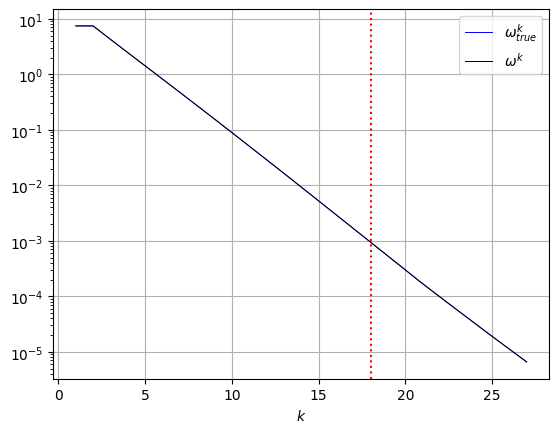

In [7]:
ob.plot_true_abs_gap_uk(lk=prob.lower_bnd, uk=prob.upper_bnd, h_true=h_cvx)